In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#计算均值,要求输入数据为numpy的矩阵格式，行表示样本数，列表示特征    
def meanX(dataX):
    return np.mean(dataX,axis=0)#axis=0表示按照列来求均值，如果输入list,则axis=1


#计算方差,传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
def variance(X):
    m, n = np.shape(X)
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))    
    X1 = X - muAll
    variance = 1./m * np.diag(X1.T * X1)
    return variance

#标准化,传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
def normalize(X):
    m, n = np.shape(X)
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))    
    X1 = X - muAll
    X2 = np.tile(np.diag(X.T * X), (m, 1))
    XNorm = X1/X2
    return XNorm

# """
# 参数：
# 	- XMat：传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
# 	- k：表示取前k个特征值对应的特征向量
# 返回值：
# 	- finalData：参数一指的是返回的低维矩阵，对应于输入参数二
# 	- reconData：参数二对应的是移动坐标轴后的矩阵
# """  
def pca(XMat, k):
    average = meanX(XMat) 
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    print('data_adjust', data_adjust.shape)
    print('data_adjust.T', data_adjust.T.shape)
#     numpy中的cov函数用于求协方差矩阵，参数rowvar很重要！若rowvar=0，说明传入的数据一行代表一个样本，若非0，说明传入的数据一列代表一个样本。
#     因为newData每一行代表一个样本，所以将rowvar设置为0。covMat=np.cov(newData,rowvar=0)  
    covX = np.cov(data_adjust.T)   #计算协方差矩阵
#     调用numpy中的线性代数模块linalg中的eig函数，可以直接由covMat求得特征值和特征向量
    featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
#     print('covX', covX)
#     第三步得到了特征值向量eigVals，假设里面有m个特征值，我们可以对其排序，排在前面的n个特征值所对应的特征向量就是我们要保留的，
#     它们组成了新的特征空间的一组基n_eigVect。
#     将零均值化后的数据乘以n_eigVect就可以得到降维后的数据。
    index = np.argsort(-featValue) #按照featValue进行从大到小排序
    print('index', index)
    finalData = []
    if k > n:
        print ("k must lower than feature number")
        return
    else:
        #注意特征向量时列向量，而numpy的二维矩阵(数组)a[m][n]中，a[1]表示第1行值
        selectVec = np.matrix(featVec.T[index[:k]]) #所以这里需要进行转置
        finalData = data_adjust * selectVec.T 
        reconData = (finalData * selectVec) + average  #重构数据
    return finalData, reconData

def loaddata(datafile):
#     file = pd.read_csv(datafile,sep="\t",header=-1)
#     print(file)
    return np.array(pd.read_csv(datafile,sep="\t",header=-1)).astype(np.float)


def plotBestFit(data1, data2):	  
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)
    
    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[i,0]) 
        axis_y2.append(dataArr2[i,1])				  
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=50, c='blue')
    plt.xlabel('x1'); plt.ylabel('x2');
    plt.savefig("outfile.png")
    plt.show()	
    
def plot3D(data):
    fig = plt.figure()
    ax = Axes3D(fig)
    x = data[:,0]
    print('x',x)
    y = data[:,1]
    z = data[:,2]
    ax.scatter(x,y,z)
    plt.show()

#简单测试
#数据来源：http://www.cnblogs.com/jerrylead/archive/2011/04/18/2020209.html
def test():
    X = [[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
         [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]]
    XMat = np.matrix(X).T  
    k = 3
    return pca(XMat, k)

#根据数据集data.txt
def main():    
    datafile = "processData/18Value.txt"
#     datafile = 'dataFake.txt'
    XMat = loaddata(datafile)
#     print('xMAt', XMat)
    k = 2
    return pca(XMat, k)
    
if __name__ == "__main__":
    finalData, reconMat = main()
    print('type', type(finalData.tolist()))
    print('finaldata', finalData)
    print('reconMat', reconMat.shape)
#     print('finaldata', finalData)
    coordination = ['x', 'y']
    test=pd.DataFrame(columns=coordination,data=finalData.tolist())
    print(test)
    test.to_csv('./AfterPCAData/2Dimensions/18_2Dvalue.csv')
#     plot3D(finalData)
#     plotBestFit(finalData, reconMat)

data_adjust (168, 15)
data_adjust.T (15, 168)
index [ 0  1  2  3  4  5  6  7  8  9 12 11 10 13 14]
type <class 'list'>
finaldata [[ 2.04124088e+02 -4.49318027e+00]
 [ 1.92198650e+02 -1.37098604e+01]
 [ 3.00766486e+01 -3.81638067e+01]
 [-1.89023574e+02 -9.65629169e+00]
 [-3.74390919e+01 -2.24843883e+01]
 [ 4.28079112e+01  1.03630578e+01]
 [-1.61439974e+02  2.22022134e+01]
 [-1.97714899e+02 -5.42899243e+00]
 [-2.73537253e-10 -9.55385459e-12]
 [ 1.79149823e+02 -9.03812005e+00]
 [-1.99618673e+02 -1.28371875e+01]
 [ 1.54535648e+00 -6.56589635e+00]
 [ 4.16357186e+01 -3.42771888e+01]
 [ 5.70423277e+01 -2.92665388e+00]
 [-6.99445629e+01 -4.53543302e+00]
 [-4.98509568e+01 -5.74631076e+00]
 [ 7.16108368e+01  3.55994336e+01]
 [-1.92727651e+01 -8.31768015e+00]
 [ 5.67764030e+01  1.54675839e+01]
 [ 1.27403140e+02 -1.40668811e+01]
 [-5.56946099e+01 -2.00443698e+01]
 [ 1.40136739e+01  2.53477795e+01]
 [ 1.60559024e+02  2.05234419e+01]
 [-2.73537253e-10 -9.55385459e-12]
 [ 1.75777831e+02  4.25024444e+

     Unnamed: 0             x             y  IncomeGroup
0             0  2.041241e+02 -4.493180e+00            1
1             1  1.921987e+02 -1.370986e+01            2
2             2  3.007665e+01 -3.816381e+01            3
3             3 -1.890236e+02 -9.656292e+00            4
4             4 -3.743909e+01 -2.248439e+01            3
5             5  4.280791e+01  1.036306e+01            2
6             6 -1.614400e+02  2.220221e+01            4
7             7 -1.977149e+02 -5.428992e+00            4
8             8 -2.740000e-10 -9.550000e-12            3
9             9  1.791498e+02 -9.038120e+00            1
10           10 -1.996187e+02 -1.283719e+01            4
11           11  1.545356e+00 -6.565896e+00            1
12           12  4.163572e+01 -3.427719e+01            1
13           13  5.704233e+01 -2.926654e+00            2
14           14 -6.994456e+01 -4.535433e+00            3
15           15 -4.985096e+01 -5.746311e+00            4
16           16  7.161084e+01  

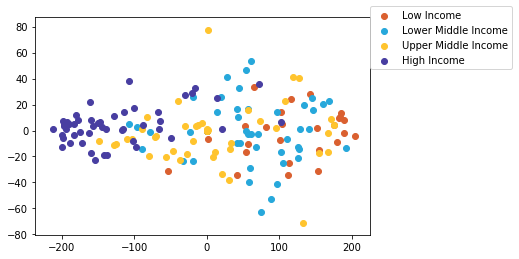

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot2D(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    LowIncome = data.loc[data['IncomeGroup'] == 1]
    LowerMidIncome = data.loc[data['IncomeGroup'] == 2]
    UpperMidIncome = data.loc[data['IncomeGroup'] == 3]
    HighIncome = data.loc[data['IncomeGroup'] == 4]
    
    ax.scatter(LowIncome['x'], LowIncome['y'], c='#DA6030', label='Low Income')
    ax.scatter(LowerMidIncome['x'], LowerMidIncome['y'], c='#27A8DB', label='Lower Middle Income')
    ax.scatter(UpperMidIncome['x'], UpperMidIncome['y'], c='#FFC42E', label='Upper Middle Income')
    ax.scatter(HighIncome['x'], HighIncome['y'], c='#483EA1', label='High Income')
    ax.legend(loc=2, bbox_to_anchor=(1.0,1.05),borderaxespad = 0.)
#     ax.legend(loc='2')
    plt.savefig('./AfterPCAPic/2d/18_2DPic.png',bbox_inches = 'tight')
    plt.show()

if __name__ == "__main__":
    after2DPcaData = pd.read_csv('./AfterPCAData/2Dimensions/18_2Dvalue.csv')
    print(after2DPcaData)
    plot2D(after2DPcaData)

     Unnamed: 0             x             y             z  IncomeGroup
0             0  2.030414e+02 -2.671947e+00  7.545689e-01            1
1             1  3.103840e+01 -1.578180e+01 -7.513138e+00            2
2             2  1.339147e+02 -4.061131e+01 -1.685141e+01            3
3             3 -1.526403e+02  9.653138e-01 -2.091244e+00            4
4             4 -7.534593e+01  2.678545e+00  2.607775e+00            3
5             5  1.378071e+02  1.136205e+01  6.067484e+00            2
6             6 -1.582624e+02 -4.206776e-01  4.324906e+00            4
7             7 -1.868978e+02  3.898748e+00 -2.198950e+00            4
8             8  8.919463e+01 -1.621593e+01  4.137399e+00            3
9             9  7.267556e+01 -6.523078e+01 -4.682229e+00            1
10           10 -1.684869e+02  4.894926e+00 -1.782899e+00            4
11           11  5.198386e+01  6.207563e+00  8.210727e+01            1
12           12  1.066624e+02 -3.353292e+01  2.559265e+01            1
13    

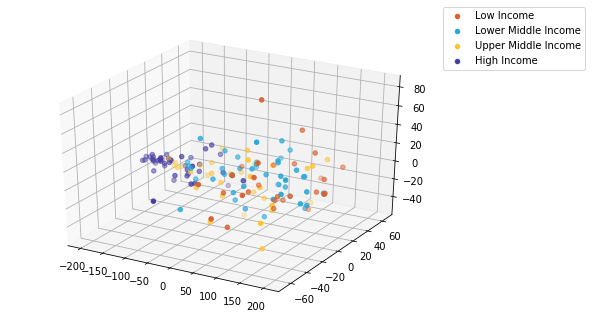

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



def plot3D(data):
    fig = plt.figure()
    ax = Axes3D(fig)
    
    
    LowIncome = data.loc[data['IncomeGroup'] == 1]
    LowerMidIncome = data.loc[data['IncomeGroup'] == 2]
    UpperMidIncome = data.loc[data['IncomeGroup'] == 3]
    HighIncome = data.loc[data['IncomeGroup'] == 4]
#     print('low',LowIncome)
#     print('lowmid', LowerMidIncome)

#     print('x',x)
#     y = data[:,1]
#     z = data[:,2]
#     ax.scatter(x,y,z)
    ax.scatter(LowIncome['x'], LowIncome['y'], LowIncome['z'], c='#DA6030', label='Low Income')
    ax.scatter(LowerMidIncome['x'], LowerMidIncome['y'], LowerMidIncome['z'], c='#27A8DB', label='Lower Middle Income')
    ax.scatter(UpperMidIncome['x'], UpperMidIncome['y'], UpperMidIncome['z'], c='#FFC42E', label='Upper Middle Income')
    ax.scatter(HighIncome['x'], HighIncome['y'], HighIncome['z'], c='#483EA1', label='High Income')
    ax.legend(loc=2, bbox_to_anchor=(1.0,1.05),borderaxespad = 0.)
#     ax.legend(loc='2')
    plt.savefig('./AfterPCAPic/07Pic.png',bbox_inches = 'tight')
    plt.show()
    
if __name__ == "__main__":
    afterPcaData = pd.read_csv('./AfterPCAData/3Dimensions/07value.csv')
    print(afterPcaData)
    plot3D(afterPcaData)